In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
#import dataframe
df=pd.read_csv('nearest-earth-objects(1910-2024).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [ ]:
df.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [ ]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [ ]:
df=df.drop(['neo_id','name','orbiting_body'],axis=1,errors='ignore')
df

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07,False
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07,False
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07,False
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06,False


In [ ]:
df.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [ ]:
X=df.drop('is_hazardous',axis=1)
y=df['is_hazardous']
X.columns

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance'],
      dtype='object')

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
feature_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']
target_column = 'is_hazardous'

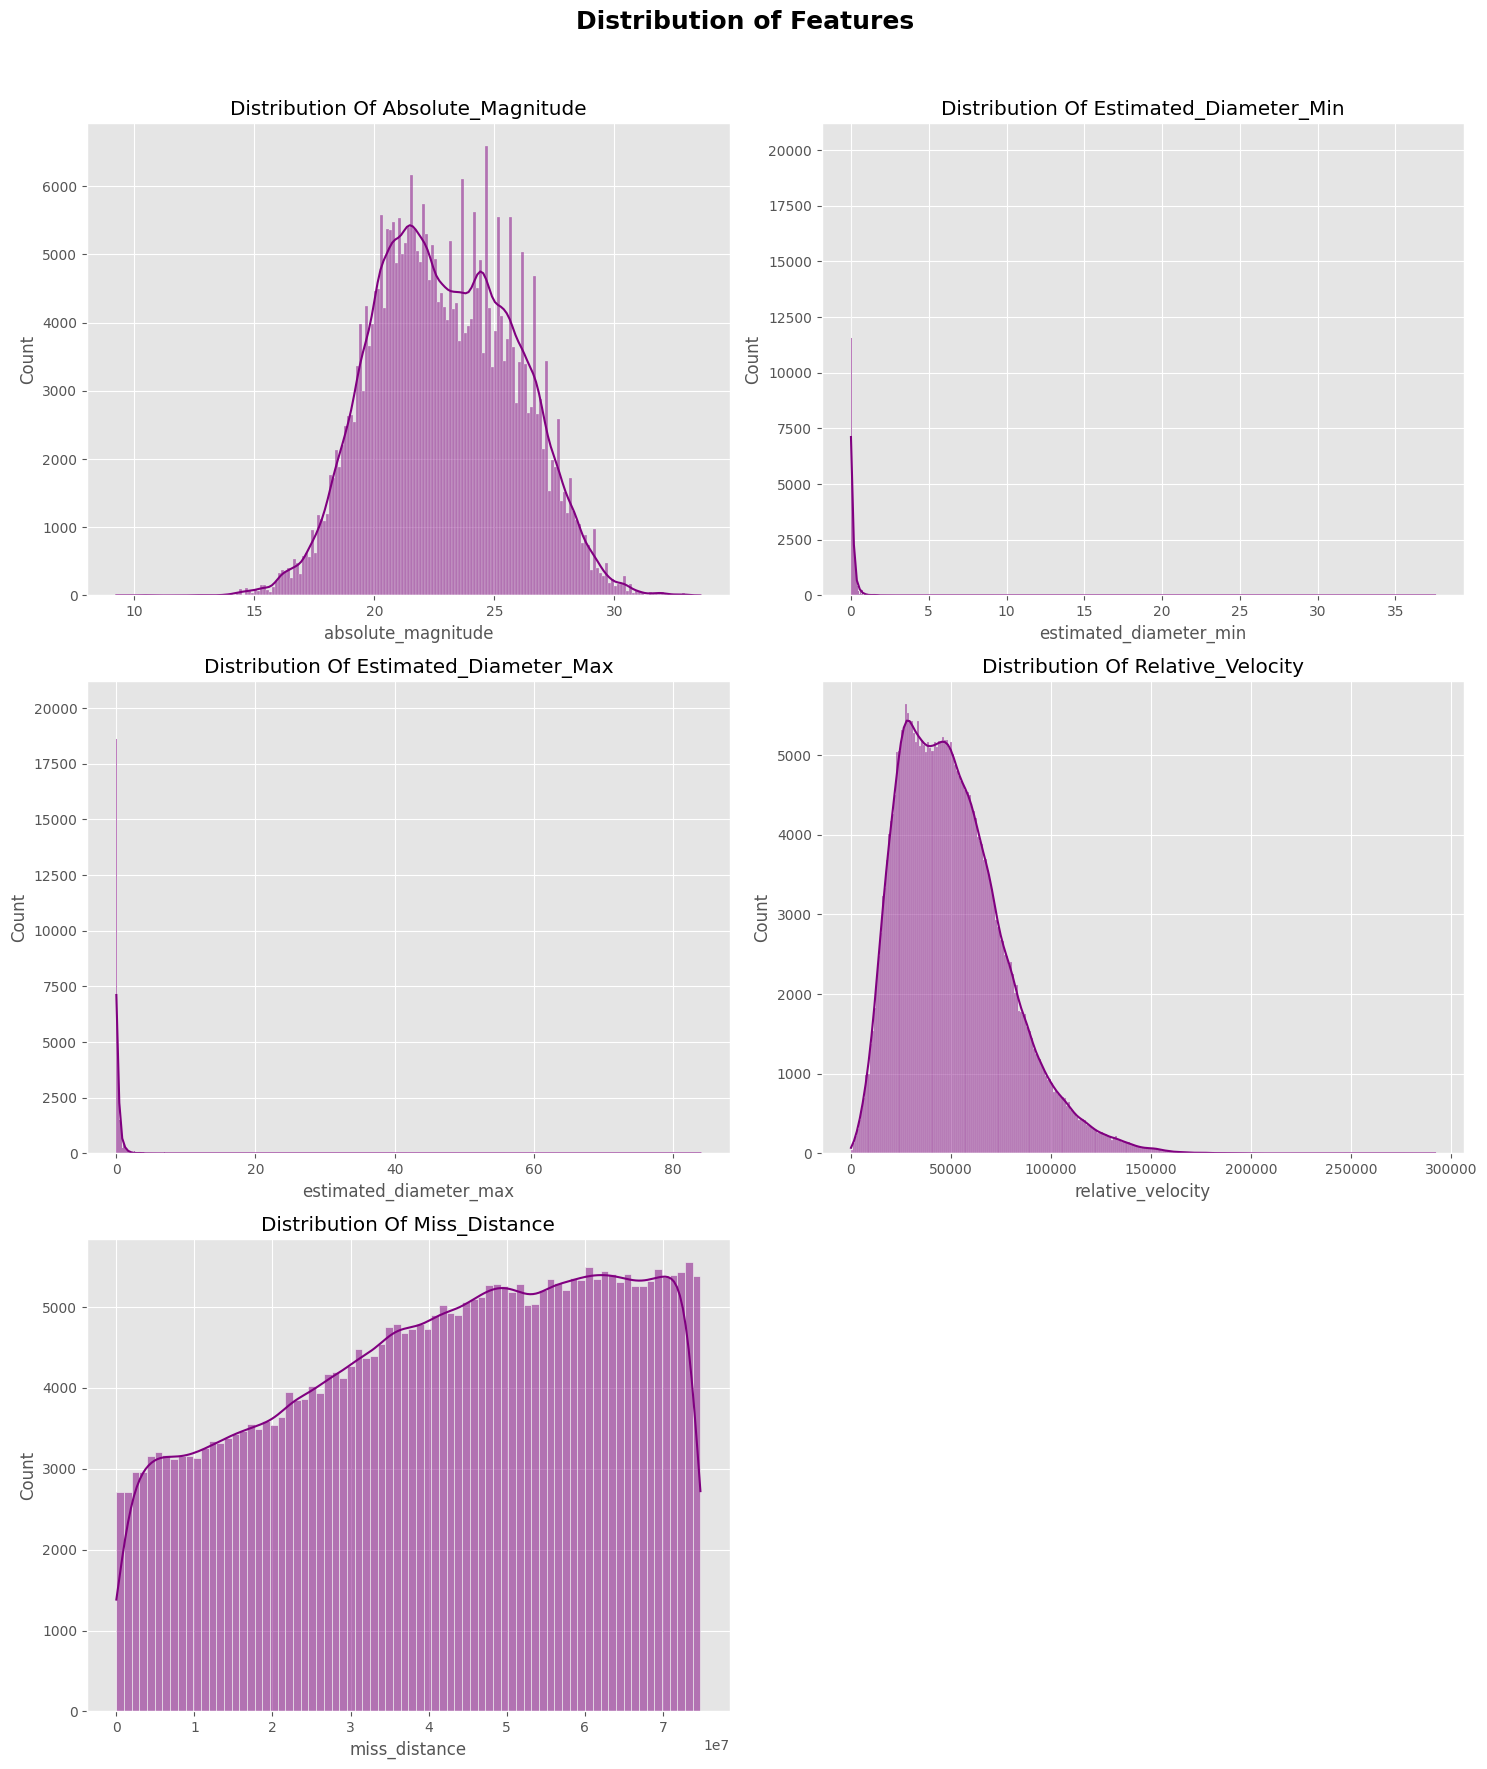

In [ ]:
#histrogram
plt.figure(figsize=(15, 18))
for i, col in enumerate(feature_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, color='purple')
    plt.title(f'Distribution of {col}'.title())
plt.suptitle('Distribution of Features', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-19-73daf963513d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column,y=column,data=df,palette='Accent')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

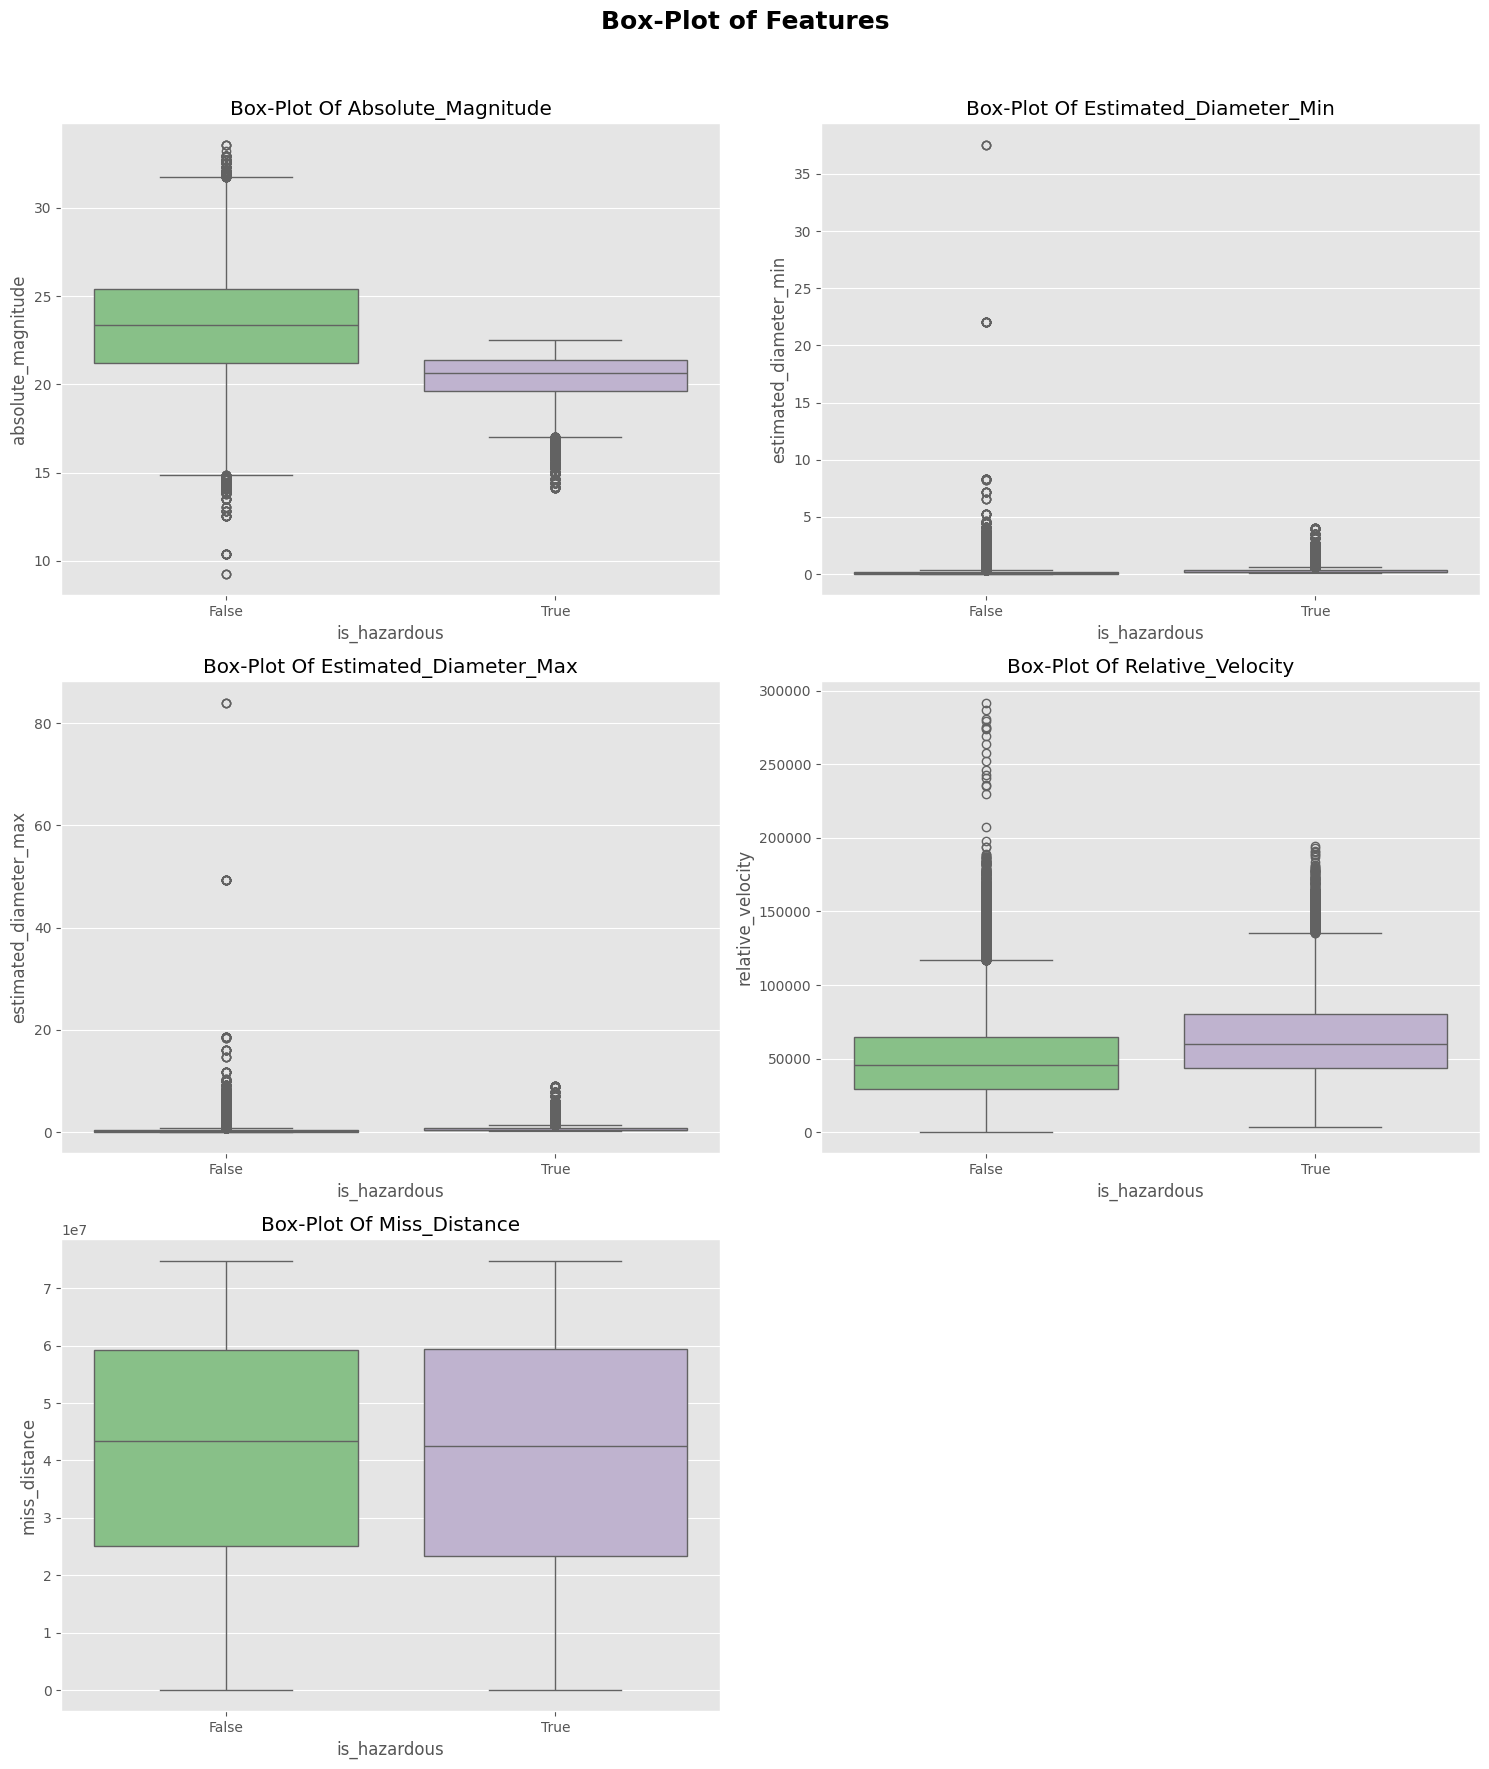

In [ ]:
# Box plots
plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=target_column,y=column,data=df,palette='Accent')
    plt.title('Box-plot of {}'.format(column).title())
plt.suptitle('Box-Plot of Features', fontsize=18 , fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-20-a4de7ae41bb4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column,y=column,data=df,palette='Paired')
<ipython-input-20-a4de7ae41bb4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column,y=column,data=df,palette='Paired')
<ipython-input-20-a4de7ae41bb4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column,y=column,data=df,palette='Paired')
<ipython-input-20-a4de7ae41bb4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

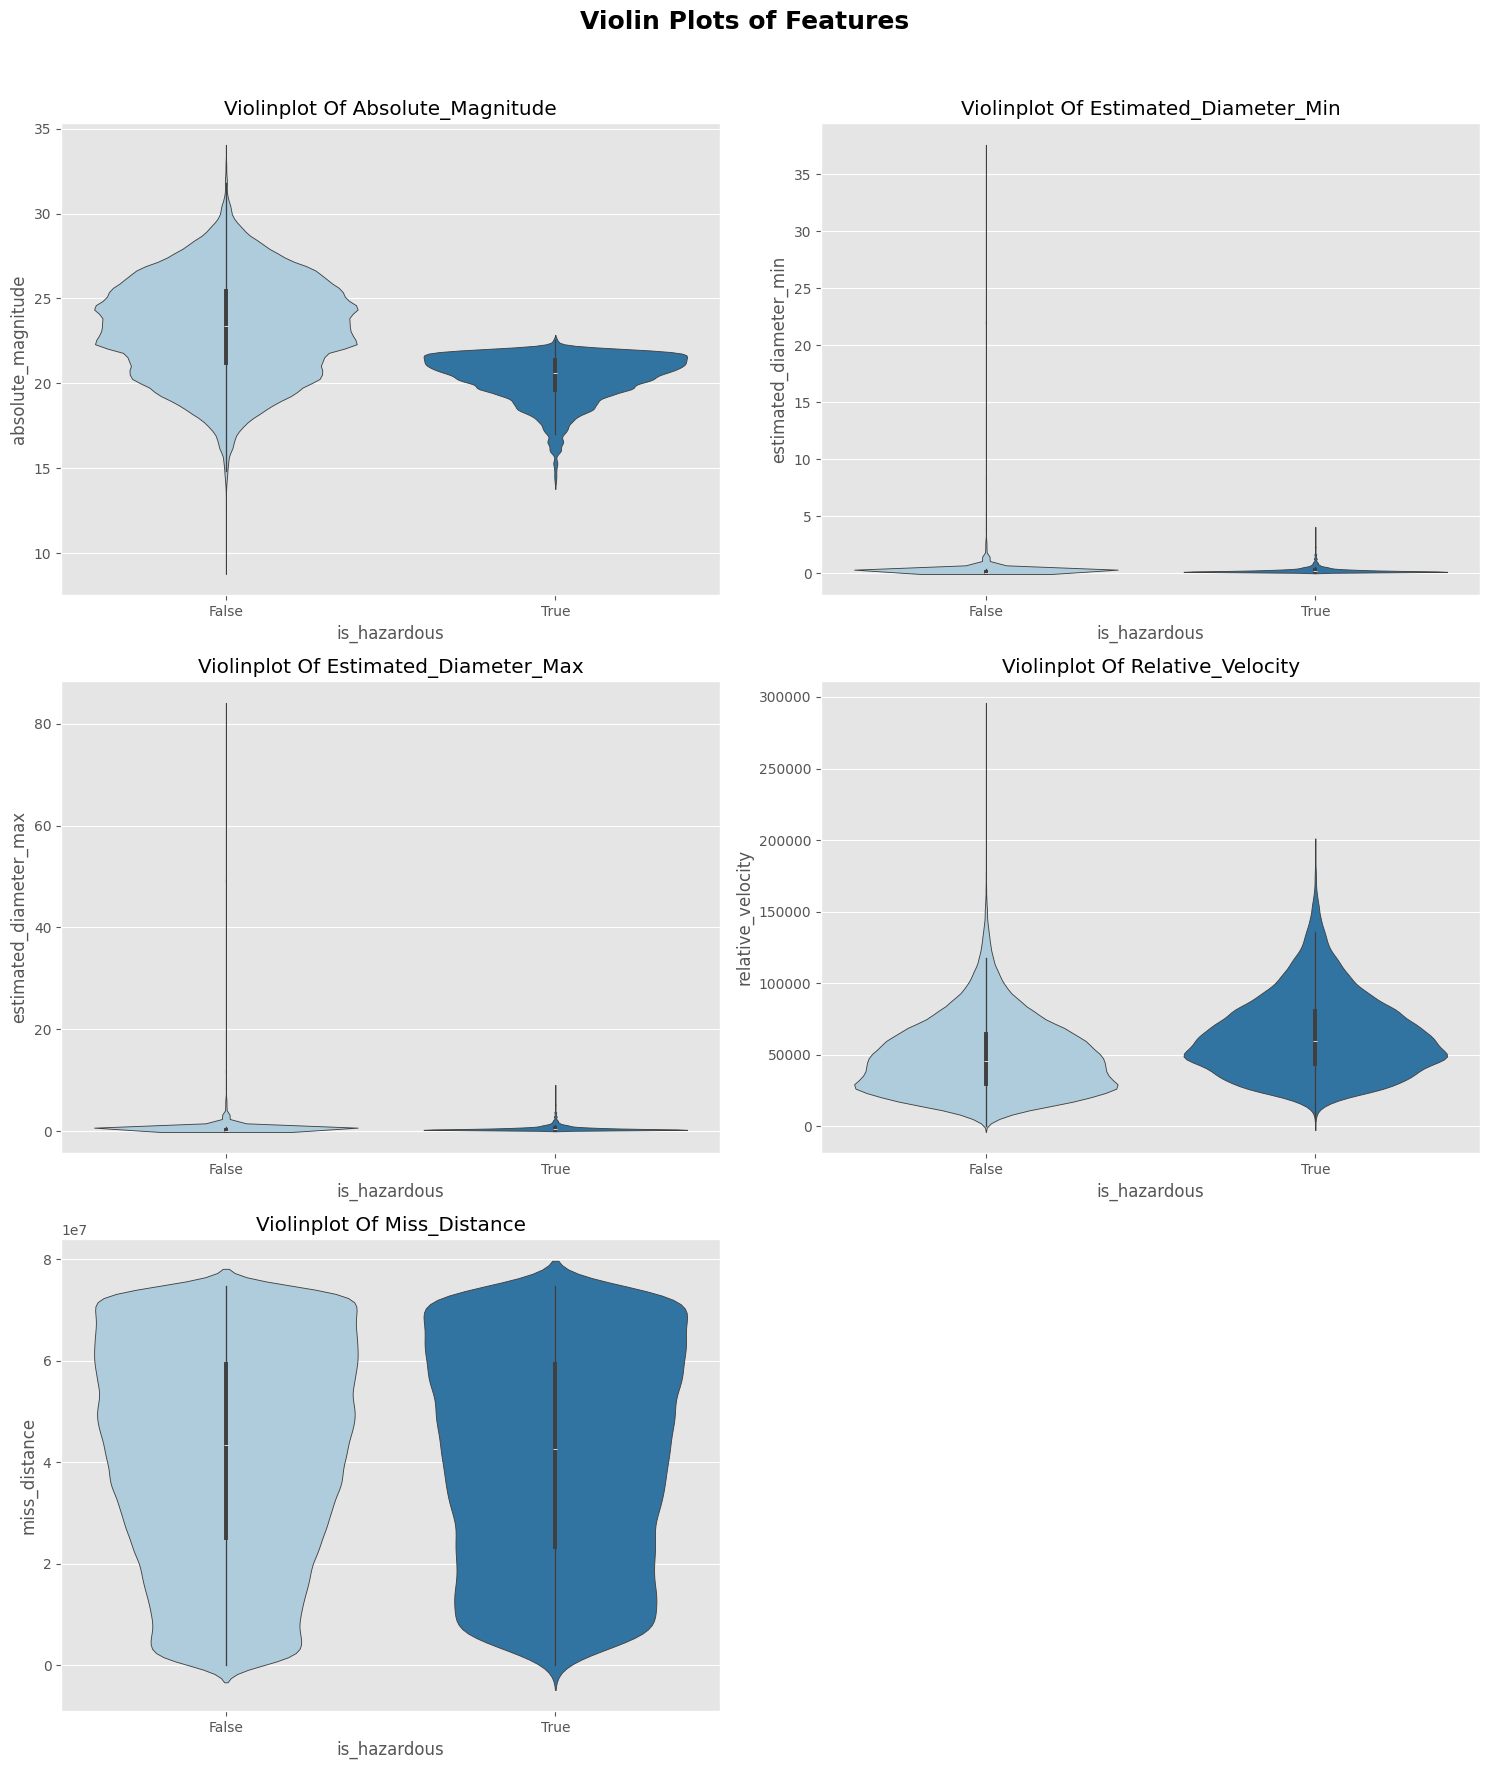

In [ ]:
plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.violinplot(x=target_column,y=column,data=df,palette='Paired')
    plt.title('Violinplot of {}'.format(column).title())
plt.suptitle('Violin Plots of Features', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

AttributeError: Text.set() got an unexpected keyword argument 'labelpad'

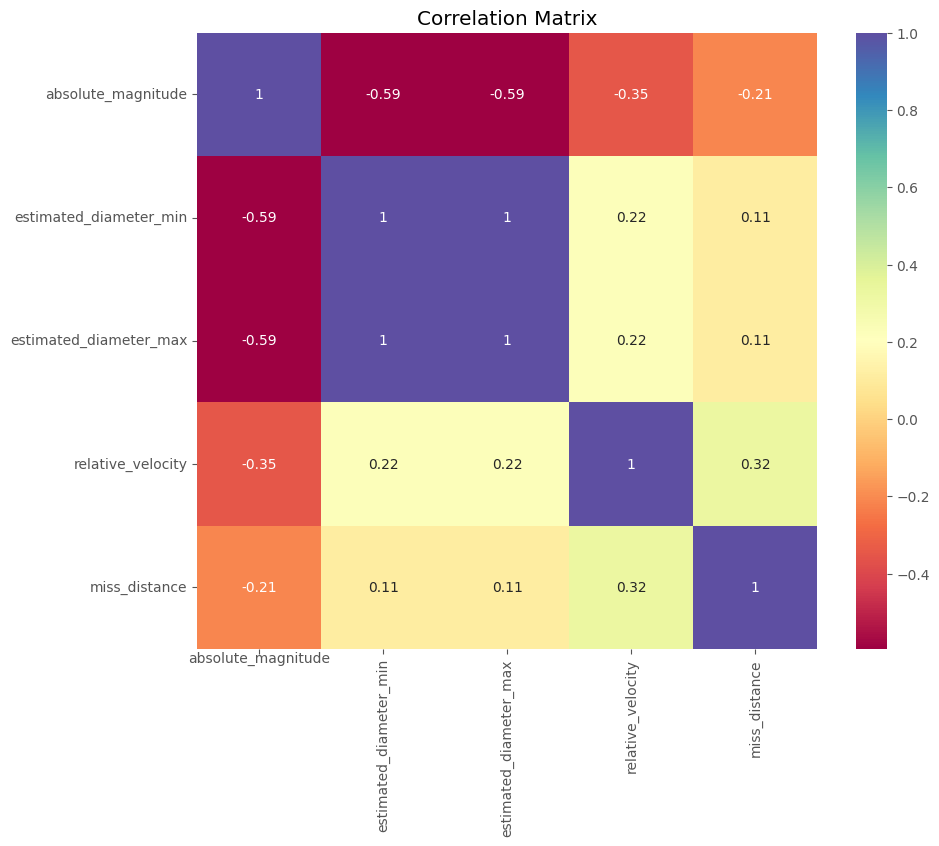

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.xticks(rotation=0, ha='center', va='center', labelpad=10)
plt.subplots_adjust(bottom=0.2)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
scaler = StandardScaler()
X=scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [ ]:
# Remove outliers from the data
data = remove_outliers(df, feature_columns)
rows_removed = df.shape[0] - data.shape[0]
print(f'📉 We have removed approximately {rows_removed} rows from the dataset.')

📉 We have removed approximately 42403 rows from the dataset.


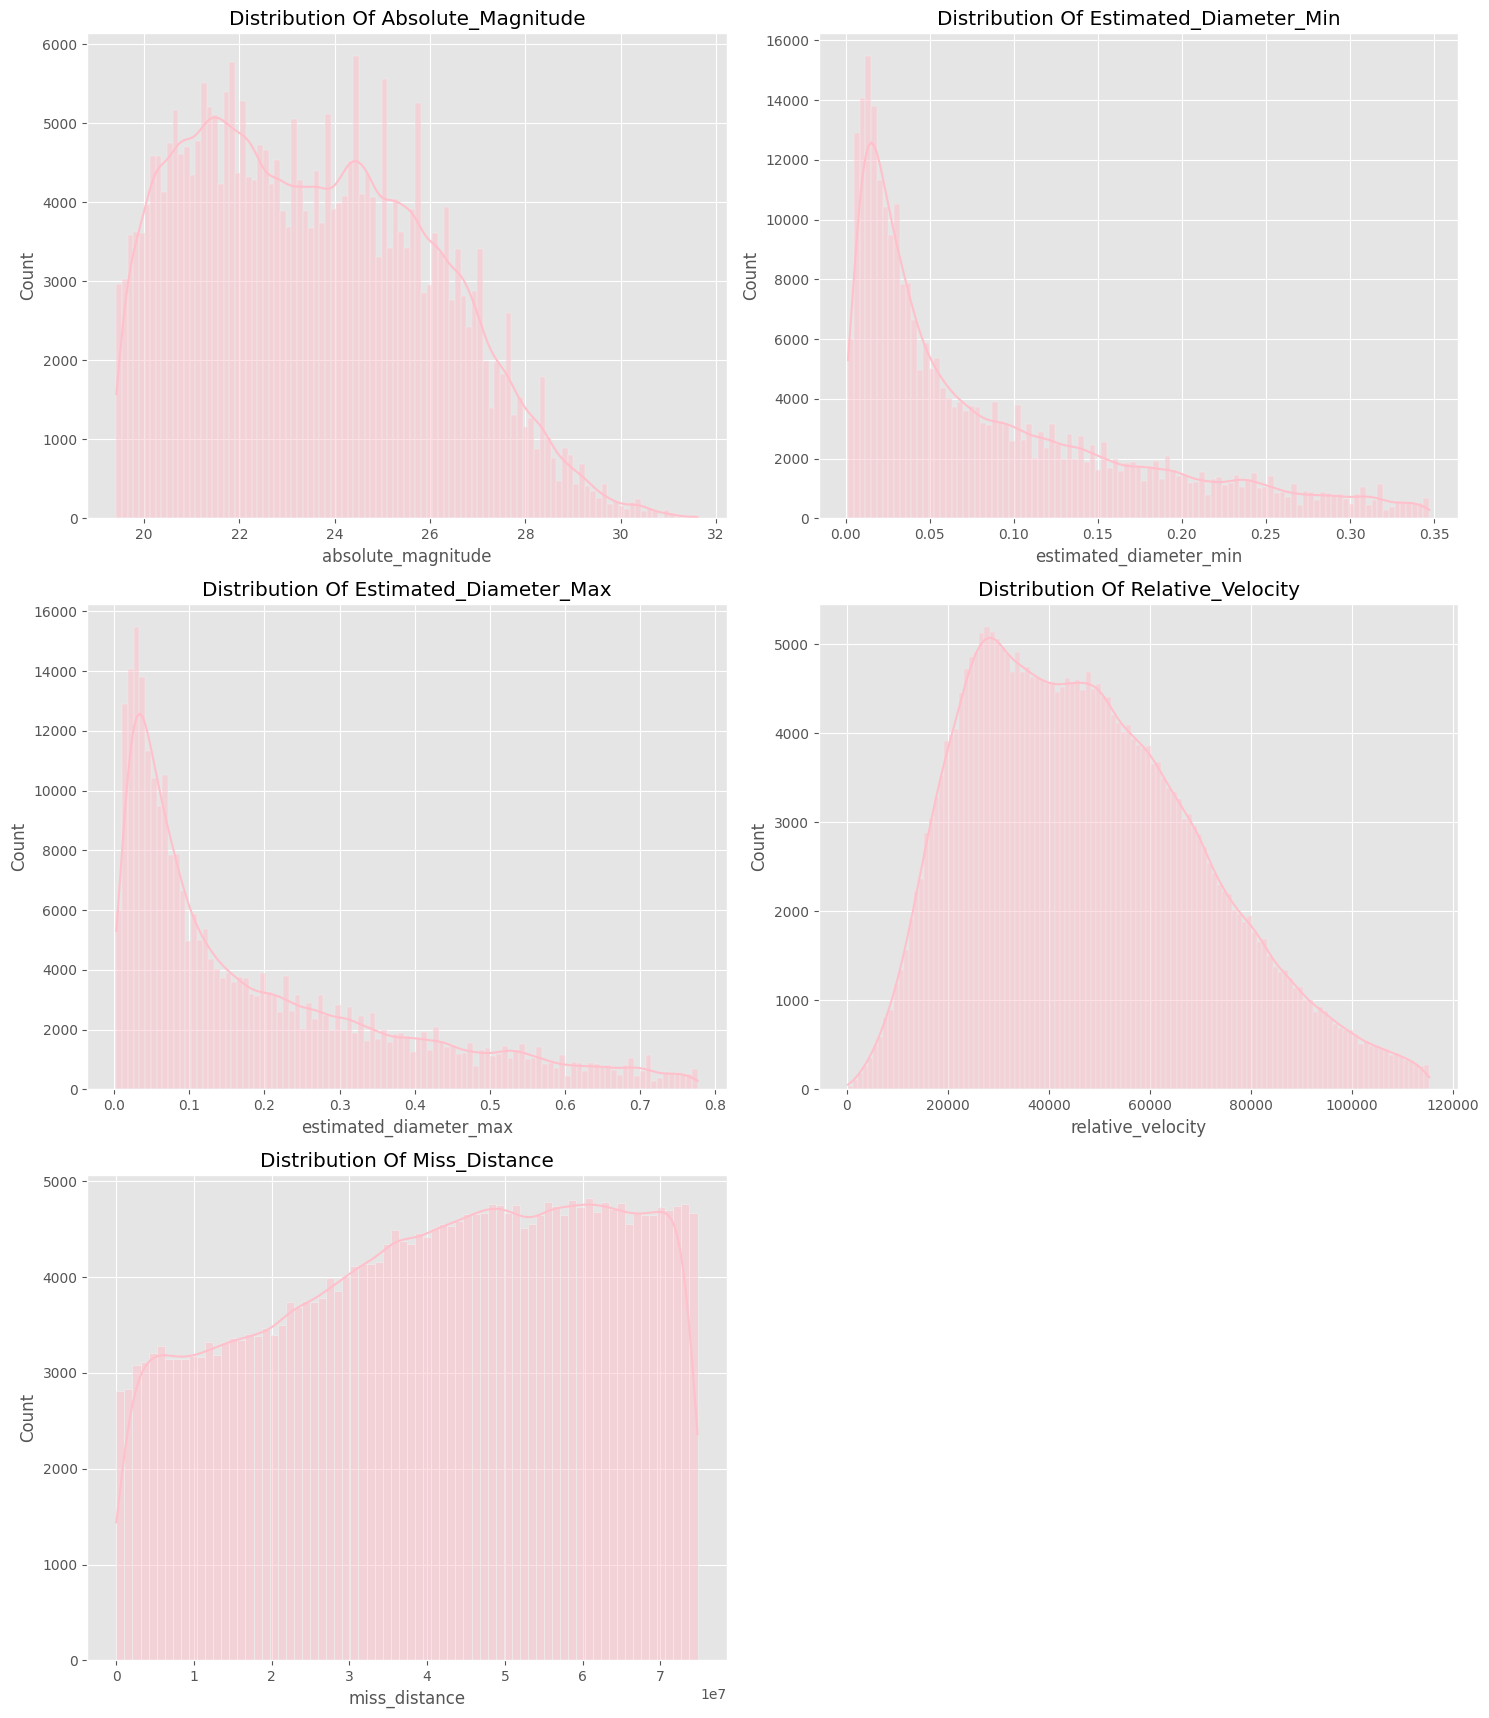

In [ ]:
# Histograms
plt.figure(figsize=(15, 18))
for i, col in enumerate(feature_columns):
   plt.subplot(3, 2, i+1)
   sns.histplot(data[col], kde=True,color='pink')
   plt.title(f'Distribution of {col}'.title())
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-26-4b4e854f4345>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=col, data=data,palette='plasma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a 

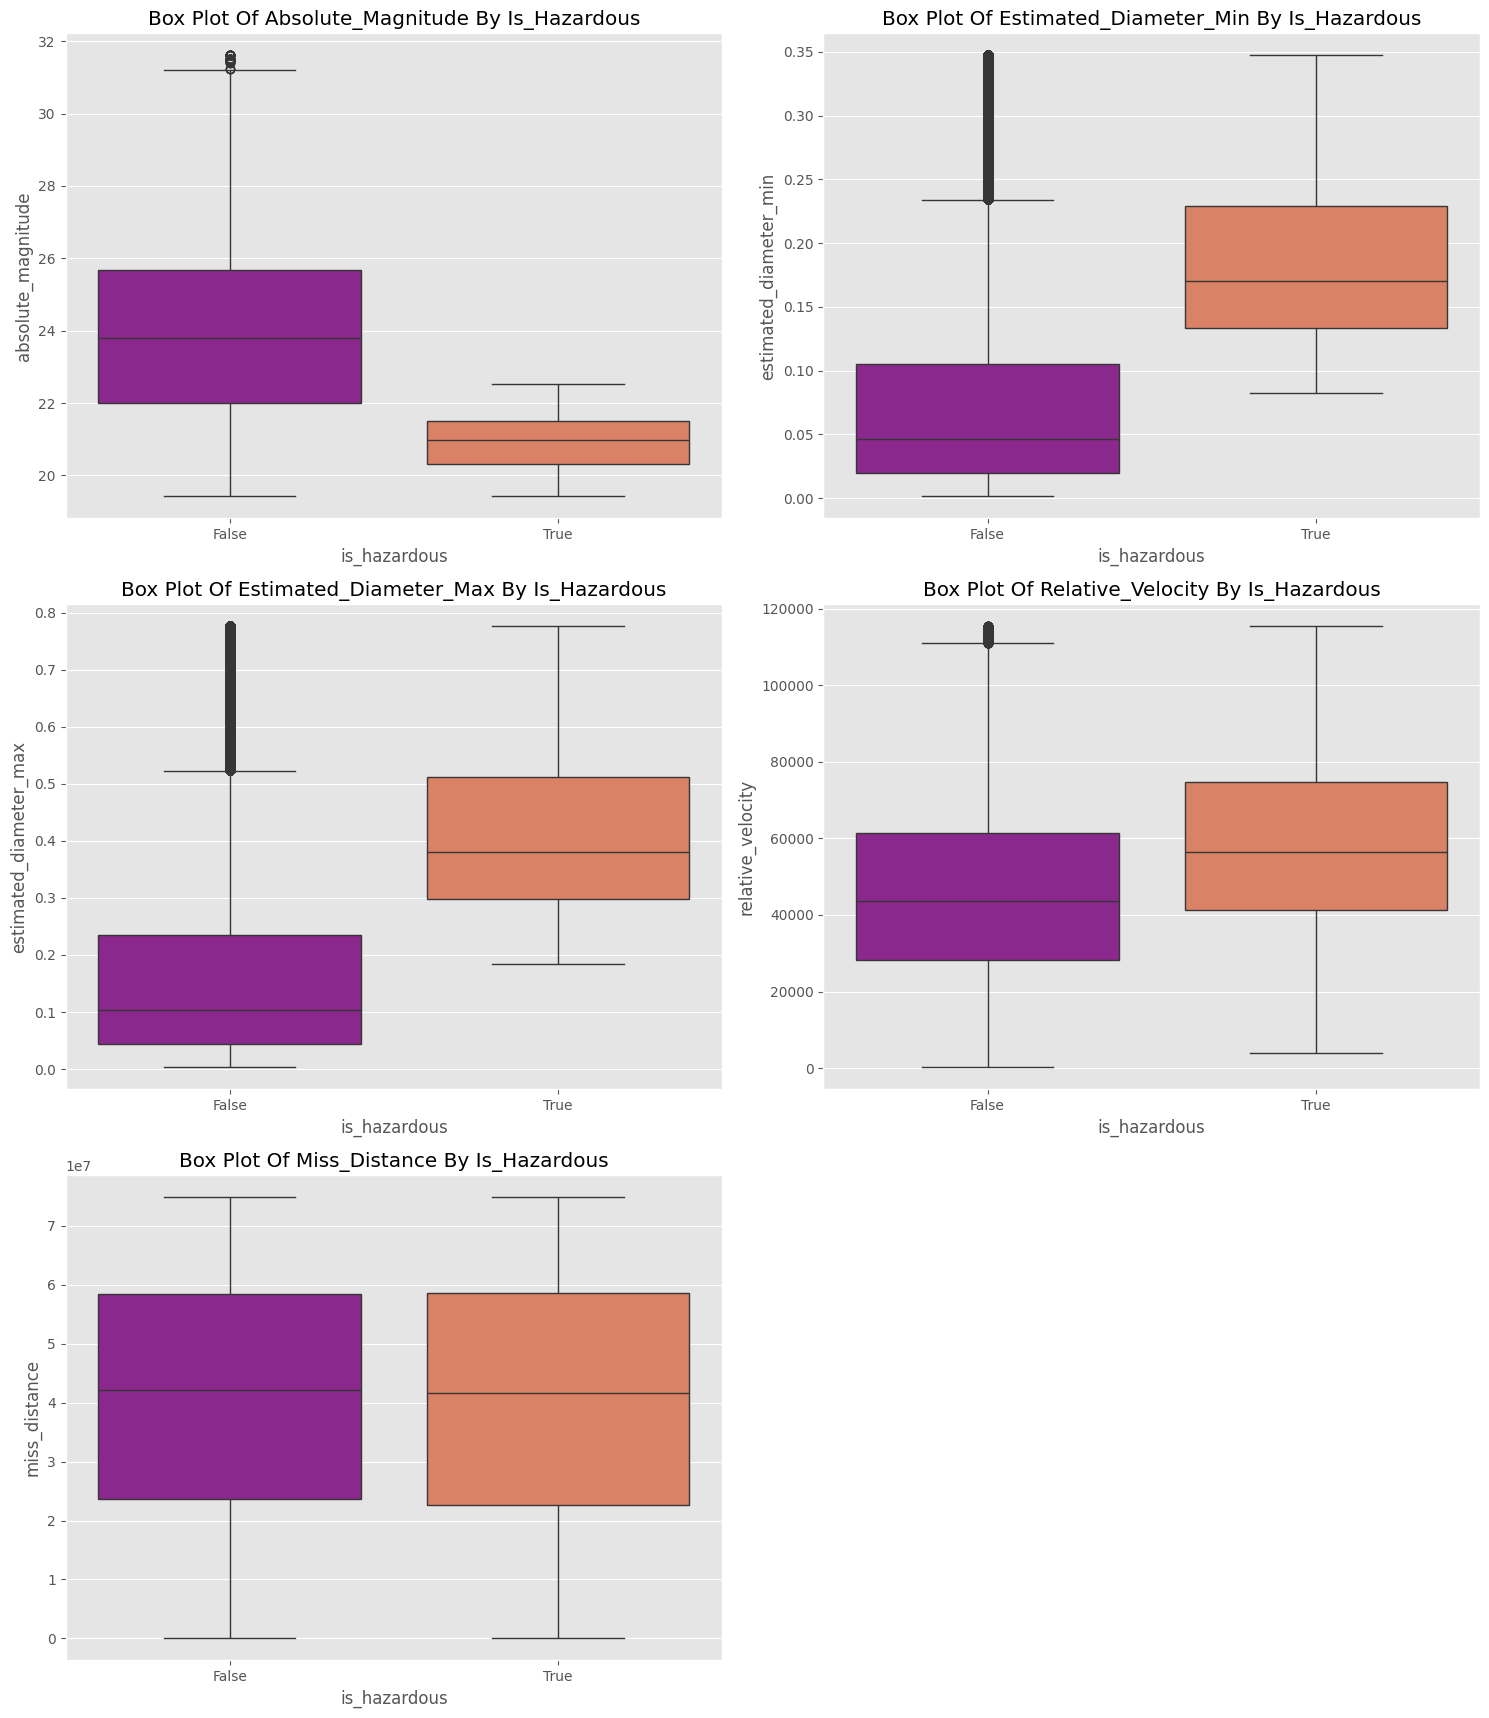

In [ ]:
# Box plots
plt.figure(figsize=(15, 18))
for i, col in enumerate(feature_columns):
   plt.subplot(3, 2, i+1)
   sns.boxplot(x=target_column, y=col, data=data,palette='plasma')
   plt.title(f'Box plot of {col} by {target_column}'.title())
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<ipython-input-27-7ea83384bc73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column,y=column,data=data,palette='Paired')
<ipython-input-27-7ea83384bc73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column,y=column,data=data,palette='Paired')
<ipython-input-27-7ea83384bc73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column,y=column,data=data,palette='Paired')
<ipython-input-27-7ea83384bc73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

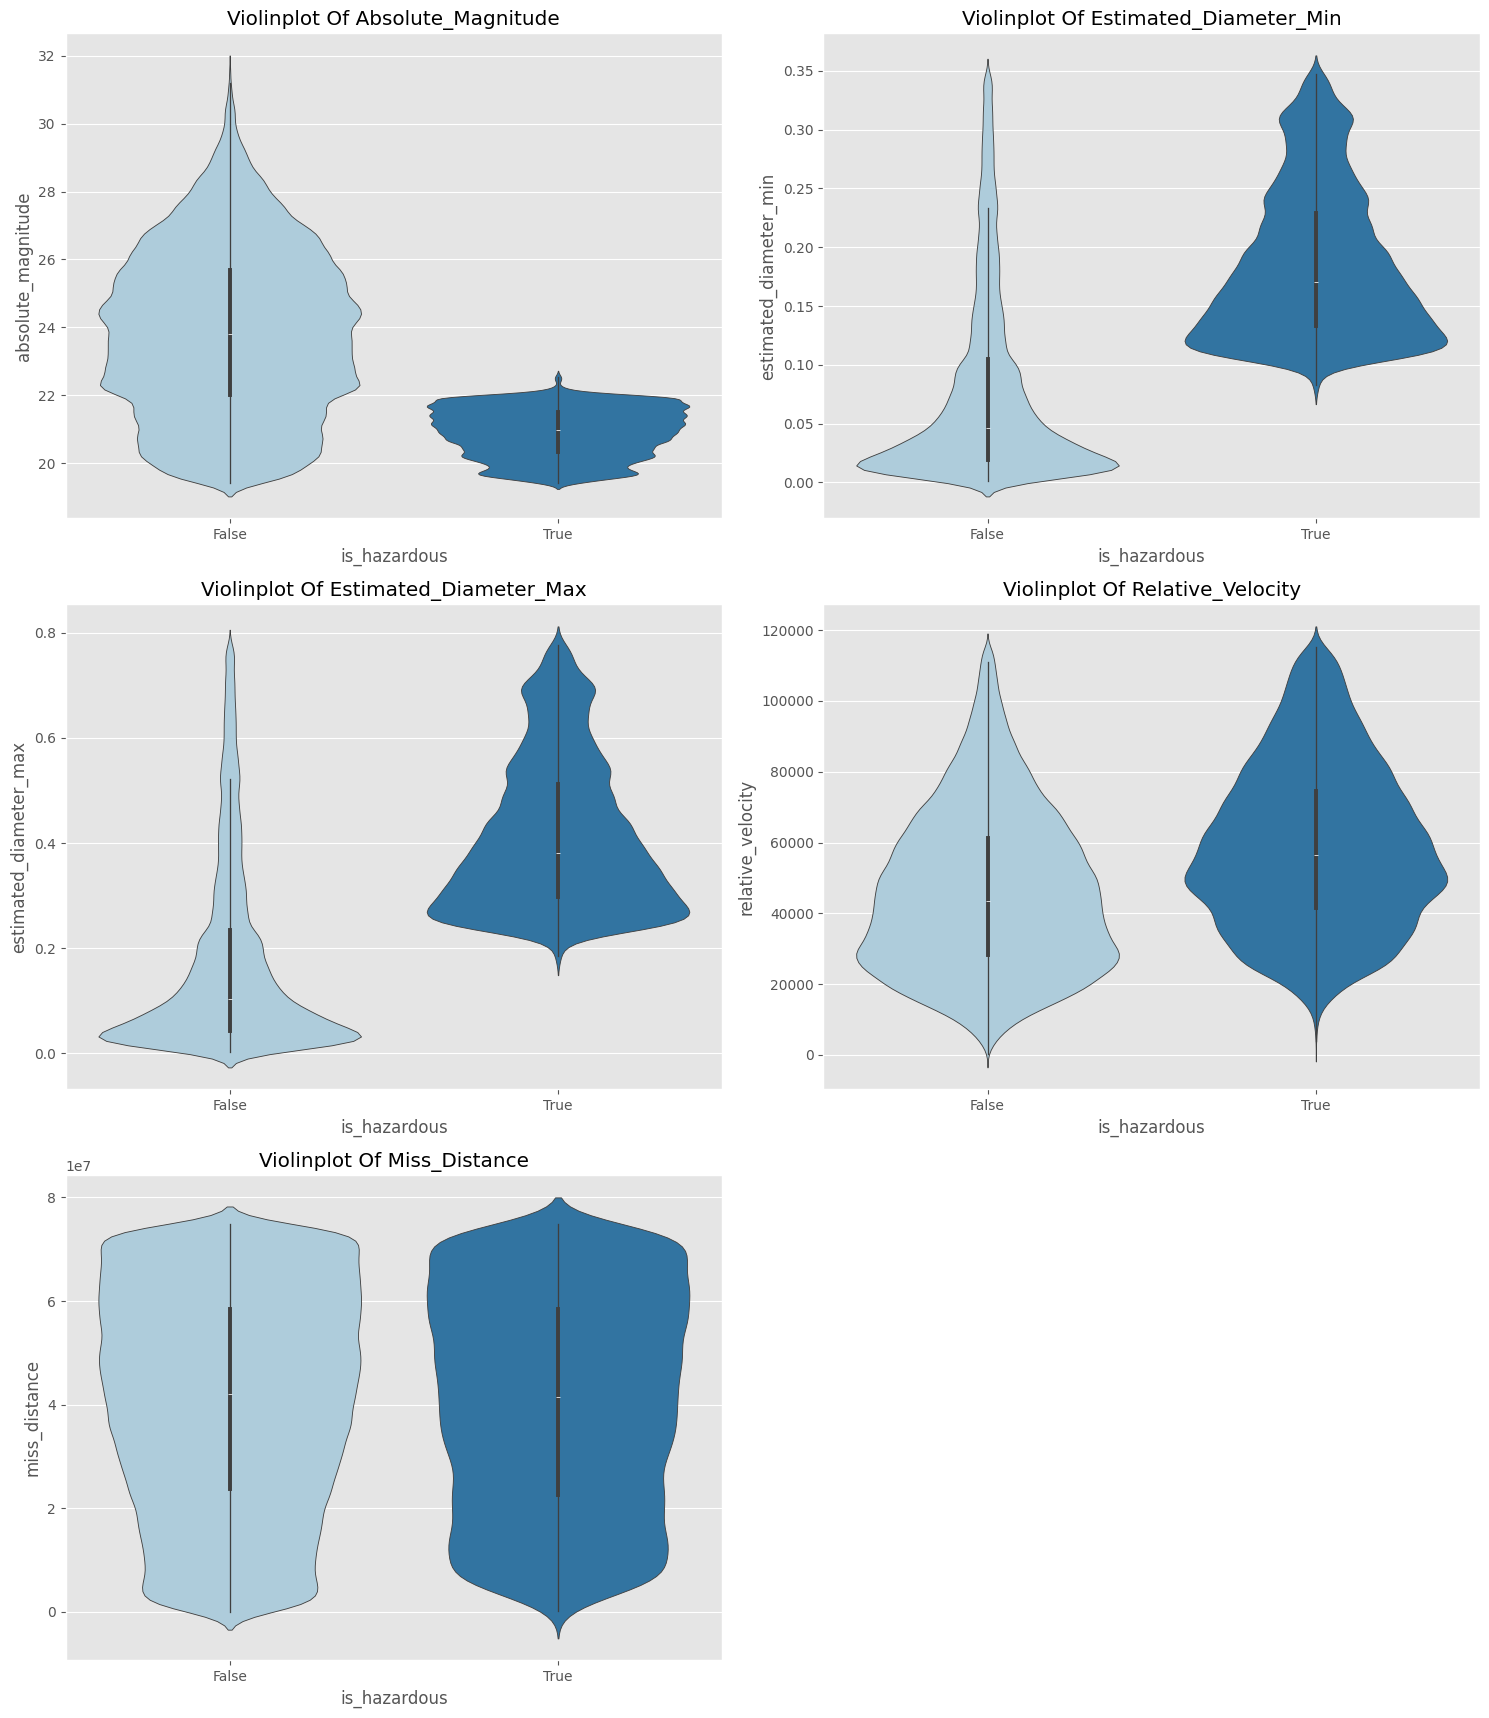

In [ ]:
plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.violinplot(x=target_column,y=column,data=data,palette='Paired')
    plt.title('Violinplot of {}'.format(column).title())
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     59088
           1       0.71      0.59      0.65      8547

    accuracy                           0.92     67635
   macro avg       0.83      0.78      0.80     67635
weighted avg       0.91      0.92      0.91     67635

Training Time: 63.1253 seconds
Prediction Time: 1.3094 seconds


<Figure size 1000x600 with 0 Axes>

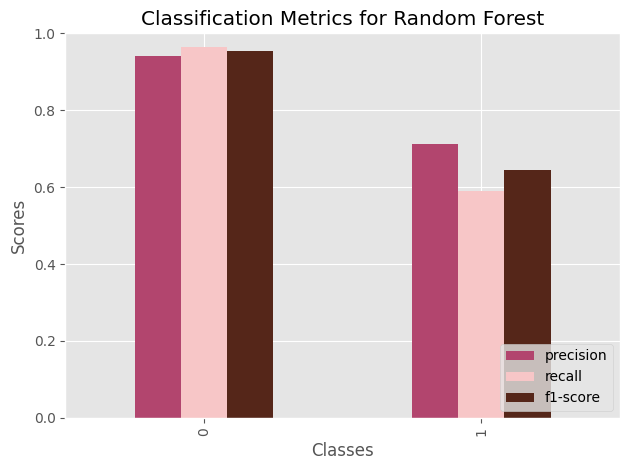

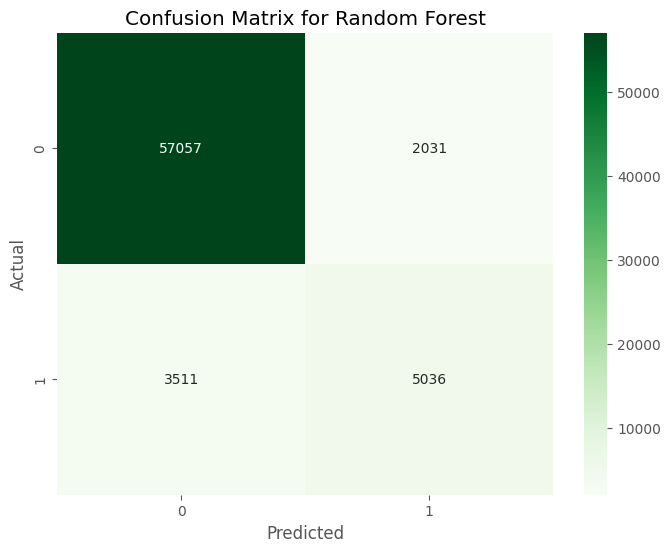

          Model  Accuracy  Training Time (s)  Prediction Time (s)  Precision  \
0  RandomForest   0.91806          63.125269             1.309358    0.91304   

    Recall  F1-Score  
0  0.91806  0.914684  


In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
numerical_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                      'relative_velocity', 'miss_distance']

X = df[numerical_features]
y = df['is_hazardous']

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Time training
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Time prediction
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

# Print time analysis
print(f'Training Time: {training_time:.4f} seconds')
print(f'Prediction Time: {prediction_time:.4f} seconds')

# Visualization of Classification Report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().iloc[:-3, :]  # Exclude avg metrics

colors = ['#B2456E', '#F7C6C7','#552619']
# Plot Precision, Recall, 'F1-Score
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', color=colors)
plt.title('Classification Metrics for Random Forest')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Save Metrics for Comparison
metrics = {
    'Model': 'RandomForest',
    'Accuracy': accuracy,
    'Training Time (s)': training_time,
    'Prediction Time (s)': prediction_time,
    'Precision': report_dict['weighted avg']['precision'],
    'Recall': report_dict['weighted avg']['recall'],
    'F1-Score': report_dict['weighted avg']['f1-score']
}

metrics_df = pd.DataFrame([metrics])
print(metrics_df)


Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
Training Time: 2.0326 seconds
Prediction Time: 0.0128 seconds
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     59088
        True       0.57      0.57      0.57      8547

    accuracy                           0.89     67635
   macro avg       0.75      0.76      0.75     67635
weighted avg       0.89      0.89      0.89     67635



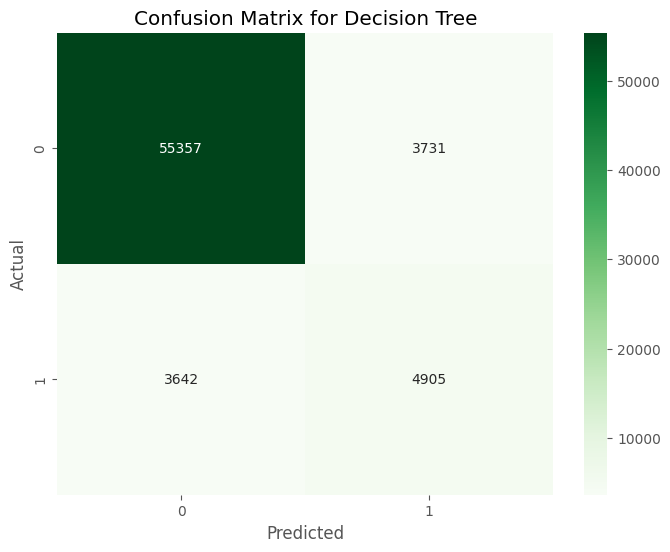

<Figure size 1000x600 with 0 Axes>

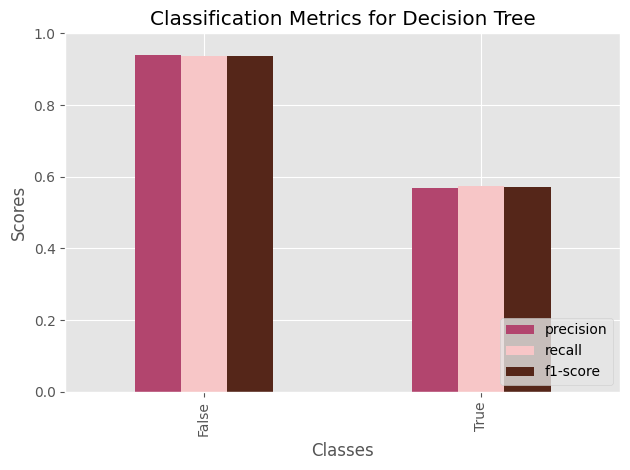

          Model  Accuracy  Training Time (s)  Prediction Time (s)  Precision  \
0  DecisionTree  0.890988           2.032552             0.012825   0.891476   

     Recall  F1-Score  
0  0.890988   0.89123  


In [ ]:
# # Decision Tree
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Features and target
numerical_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                     'relative_velocity', 'miss_distance']

X = df[numerical_features]
y = df['is_hazardous']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Decision Tree classifier with time analysis
start_time = time.time()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Prediction with time analysis
start_time = time.time()
y_pred = dt_classifier.predict(X_test_scaled)
prediction_time = time.time() - start_time

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Training Time: {training_time:.4f} seconds')
print(f'Prediction Time: {prediction_time:.4f} seconds')

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
           xticklabels=['0', '1'],
           yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Visualization of Classification Report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().iloc[:-3, :]  # Exclude avg metrics

colors = ['#B2456E', '#F7C6C7','#552619']
# Plot Precision, Recall, F1-Score
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar',color=colors)
plt.title('Classification Metrics for Decision Tree')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Save Metrics for Comparison
metrics = {
   'Model': 'DecisionTree',
   'Accuracy': accuracy,
   'Training Time (s)': training_time,
   'Prediction Time (s)': prediction_time,
   'Precision': precision,
   'Recall': recall,
   'F1-Score': f1
}

metrics_df = pd.DataFrame([metrics])
print(metrics_df)

Evaluation for XGBoost Classifier:
Training Time: 1.6077 seconds
Prediction Time: 0.1155 seconds
Accuracy: 0.8939
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94     59088
        True       0.71      0.28      0.40      8547

    accuracy                           0.89     67635
   macro avg       0.80      0.63      0.67     67635
weighted avg       0.88      0.89      0.87     67635



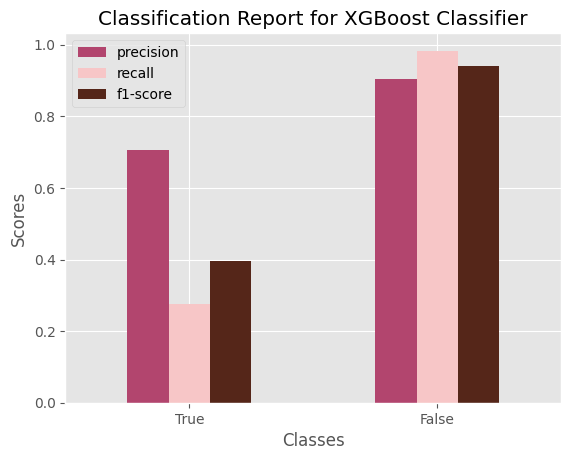

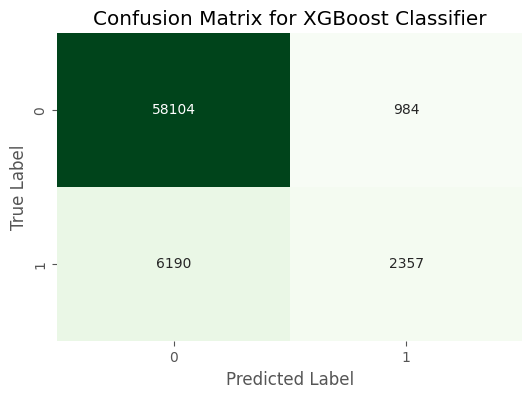

Evaluation for Gradient Boosting Classifier:
Training Time: 73.8782 seconds
Prediction Time: 0.1471 seconds
Accuracy: 0.8860
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.99      0.94     59088
        True       0.71      0.16      0.27      8547

    accuracy                           0.89     67635
   macro avg       0.80      0.58      0.60     67635
weighted avg       0.87      0.89      0.85     67635



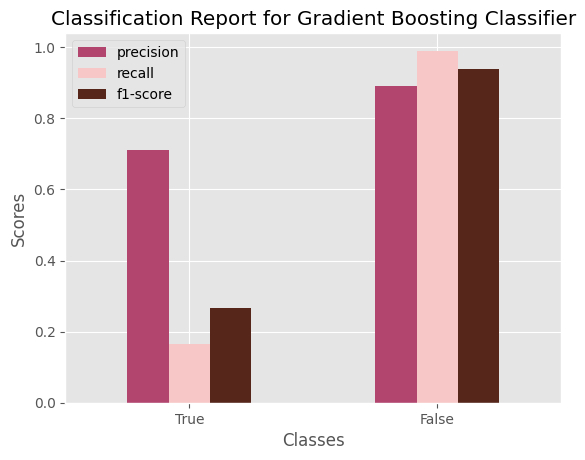

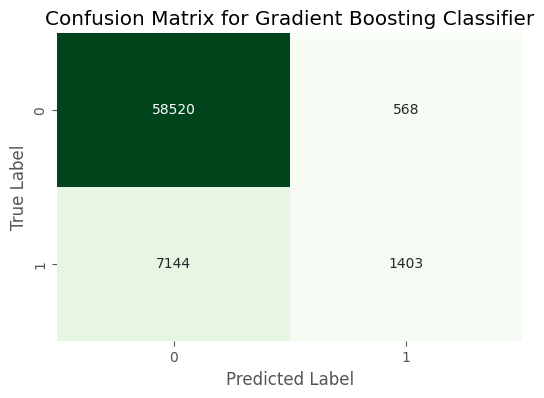

Evaluation for Voting Classifier:
Training Time: 74.7192 seconds
Prediction Time: 0.2139 seconds
Accuracy: 0.8900
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94     59088
        True       0.74      0.20      0.32      8547

    accuracy                           0.89     67635
   macro avg       0.82      0.60      0.63     67635
weighted avg       0.88      0.89      0.86     67635



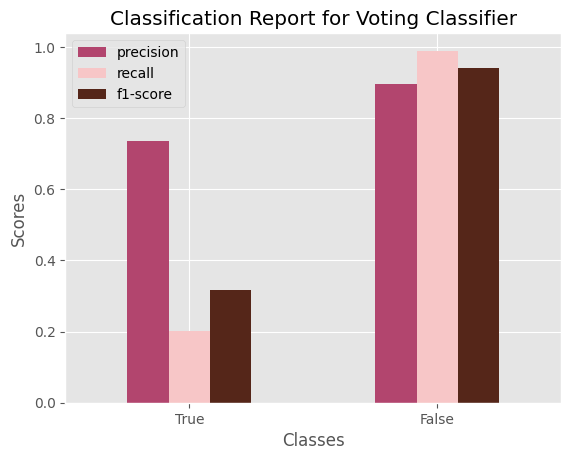

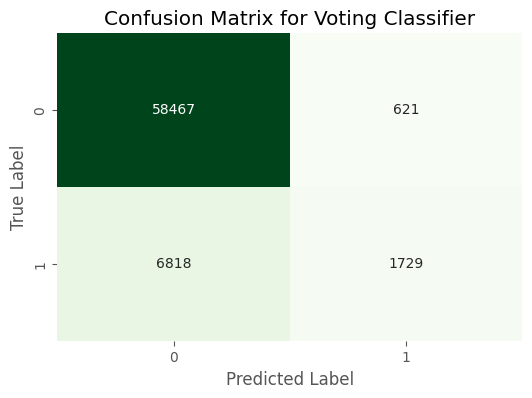

In [ ]:
# # Ensemble Algorithms(XGBoost, Gradient Boosting, and Voting Classifier):
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

# Initialize models
xgb_model = XGBClassifier()
gb_model = GradientBoostingClassifier()
voting_model = VotingClassifier(estimators=[
   ('xgb', xgb_model),
   ('gb', gb_model)
], voting='soft')

# Function to evaluate the model and measure training and prediction time
def evaluate_model_with_time(model, X_train, X_test, y_train, y_test, model_name):
   # Train model and measure time
   start_train = time.time()
   model.fit(X_train, y_train)
   end_train = time.time()
   training_time = end_train - start_train

   # Predict and measure time
   start_pred = time.time()
   y_pred = model.predict(X_test)
   end_pred = time.time()
   prediction_time = end_pred - start_pred

   # Print evaluation metrics
   print(f"Evaluation for {model_name}:")
   print(f"Training Time: {training_time:.4f} seconds")
   print(f"Prediction Time: {prediction_time:.4f} seconds")
   print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
   print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

   # Create a DataFrame from the classification report
   report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

   return y_pred, training_time, prediction_time, report_df

# Function to plot classification metrics for only 'True' and 'False' classes
def plot_classification_report_for_true_false(report_df, model_name):
   # Filter the DataFrame for 'True' and 'False' classes
   filtered_report_df = report_df.loc[['True', 'False'], ['precision', 'recall', 'f1-score']]

   # Define custom colors
   colors = ['#B2456E', '#F7C6C7','#552619']  # Custom colors for the bars

   # Plot the bar chart
   filtered_report_df.plot(kind='bar', color=colors)

   # Add title and labels
   plt.title(f'Classification Report for {model_name}')
   plt.xlabel('Classes')
   plt.ylabel('Scores')
   plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

   # Show the plot
   plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
   cm = confusion_matrix(y_true, y_pred)
   plt.figure(figsize=(6, 4))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
   plt.title(f'Confusion Matrix for {model_name}')
   plt.xlabel('Predicted Label')
   plt.ylabel('True Label')
   plt.show()

# Evaluate XGBoost Classifier
xgb_predictions, xgb_train_time, xgb_pred_time, xgb_report = evaluate_model_with_time(xgb_model, X_train, X_test, y_train, y_test, "XGBoost Classifier")
plot_classification_report_for_true_false(xgb_report, "XGBoost Classifier")
plot_confusion_matrix(y_test, xgb_predictions, "XGBoost Classifier")

# Evaluate Gradient Boosting Classifier
gb_predictions, gb_train_time, gb_pred_time, gb_report = evaluate_model_with_time(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting Classifier")
plot_classification_report_for_true_false(gb_report, "Gradient Boosting Classifier")
plot_confusion_matrix(y_test, gb_predictions, "Gradient Boosting Classifier")

# Evaluate Voting Classifier
voting_predictions, voting_train_time, voting_pred_time, voting_report = evaluate_model_with_time(voting_model, X_train, X_test, y_train, y_test, "Voting Classifier")
plot_classification_report_for_true_false(voting_report, "Voting Classifier")
plot_confusion_matrix(y_test, voting_predictions, "Voting Classifier")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00
Logistic Regression Classification Report
              precision    recall  f1-score   support

       False       0.88      0.99      0.93     59088
        True       0.32      0.02      0.04      8547

    accuracy                           0.87     67635
   macro avg       0.60      0.51      0.48     67635
weighted avg       0.81      0.87      0.82     67635

Accuracy: 87.11%
Training Time: 1.5926 seconds
Prediction Time: 0.0030 seconds



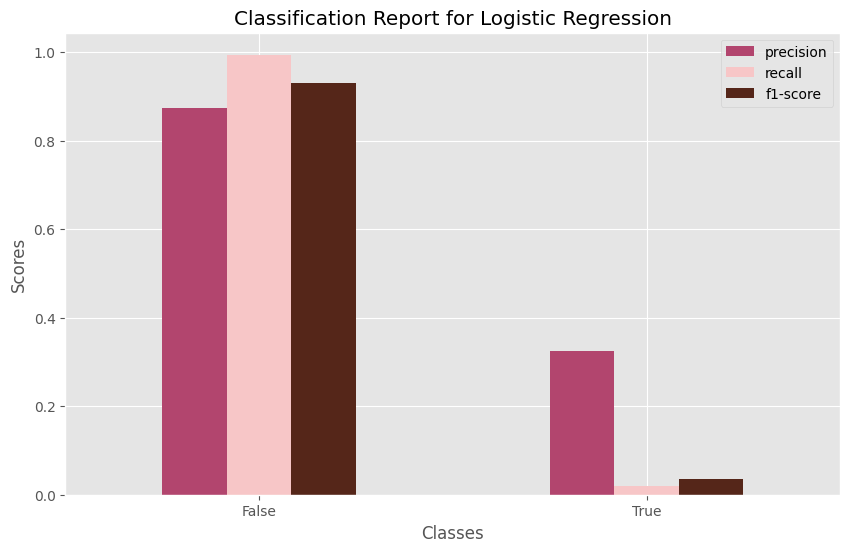

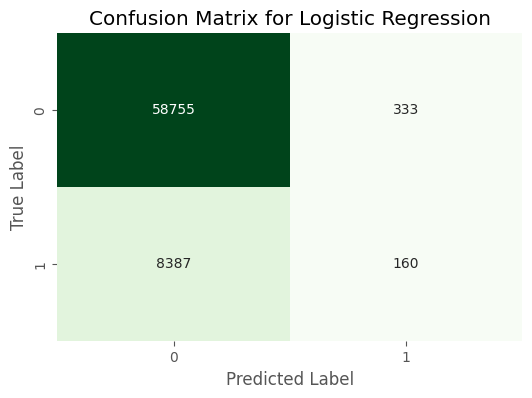

CatBoost Classification Report
              precision    recall  f1-score   support

       False       0.90      0.98      0.94     59088
        True       0.69      0.25      0.36      8547

    accuracy                           0.89     67635
   macro avg       0.79      0.62      0.65     67635
weighted avg       0.87      0.89      0.87     67635

Accuracy: 89.06%
Training Time: 63.8373 seconds
Prediction Time: 0.0797 seconds



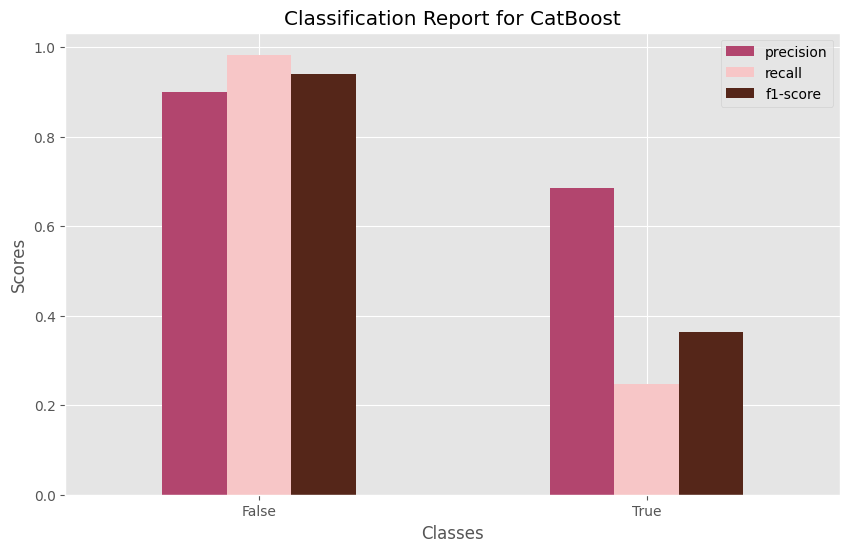

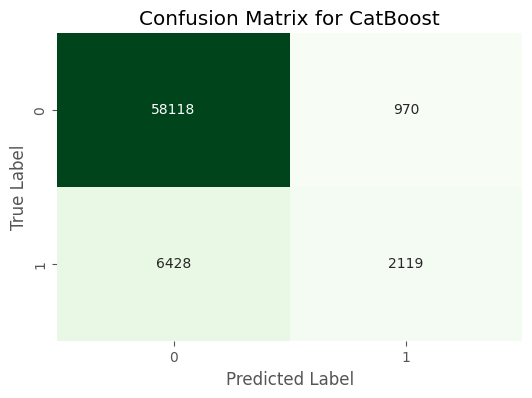

K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

       False       0.88      0.97      0.92     59088
        True       0.28      0.07      0.12      8547

    accuracy                           0.86     67635
   macro avg       0.58      0.52      0.52     67635
weighted avg       0.80      0.86      0.82     67635

Accuracy: 85.85%
Training Time: 0.3735 seconds
Prediction Time: 3.7989 seconds



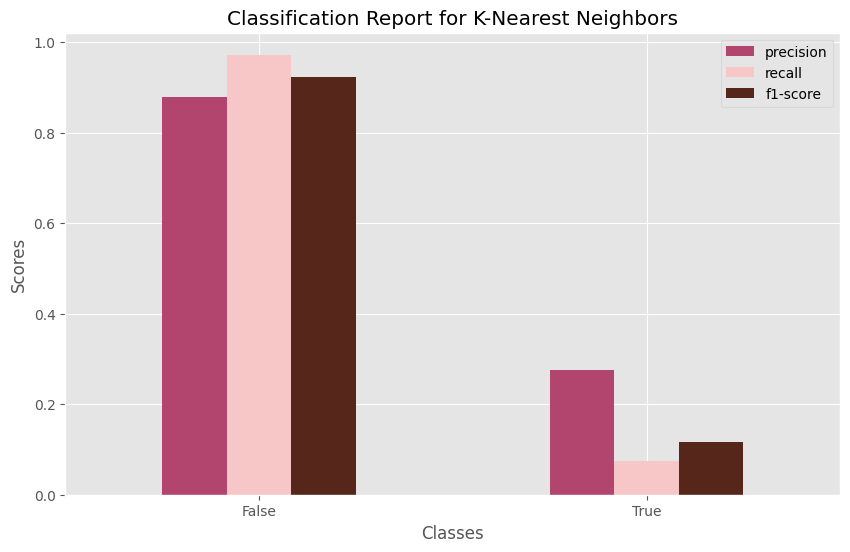

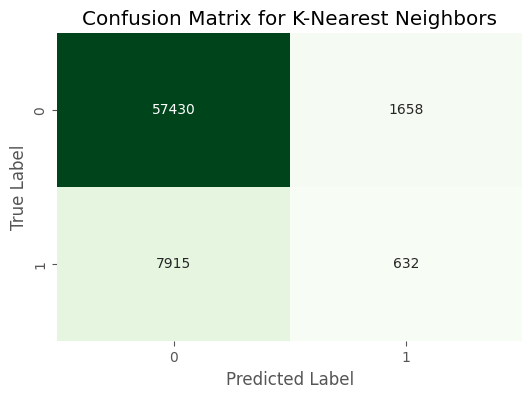

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Means Clustering Classification Report
              precision    recall  f1-score   support

           0       0.87      0.27      0.41     59088
           1       0.13      0.37      0.19      8547
           2       0.00      0.00      0.00         0

    accuracy                           0.28     67635
   macro avg       0.33      0.21      0.20     67635
weighted avg       0.77      0.28      0.39     67635

Accuracy: 28.42%
Training Time: 0.2597 seconds
Prediction Time: 0.0039 seconds



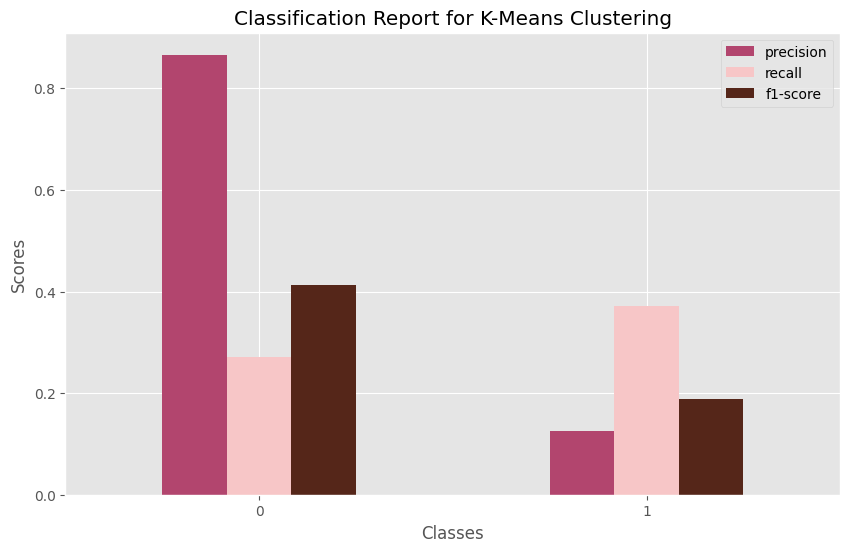

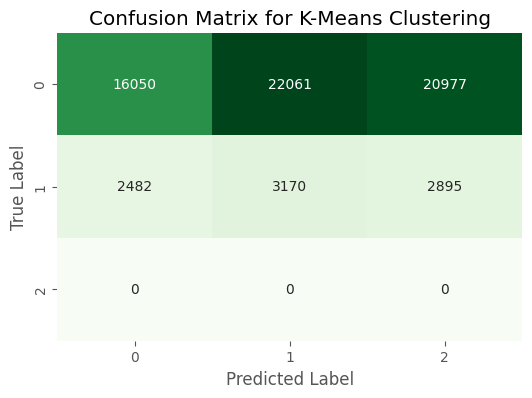

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine (SVM) Classification Report
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     59088
        True       0.00      0.00      0.00      8547

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635

Accuracy: 87.36%
Training Time: 1038.6336 seconds
Prediction Time: 257.2540 seconds



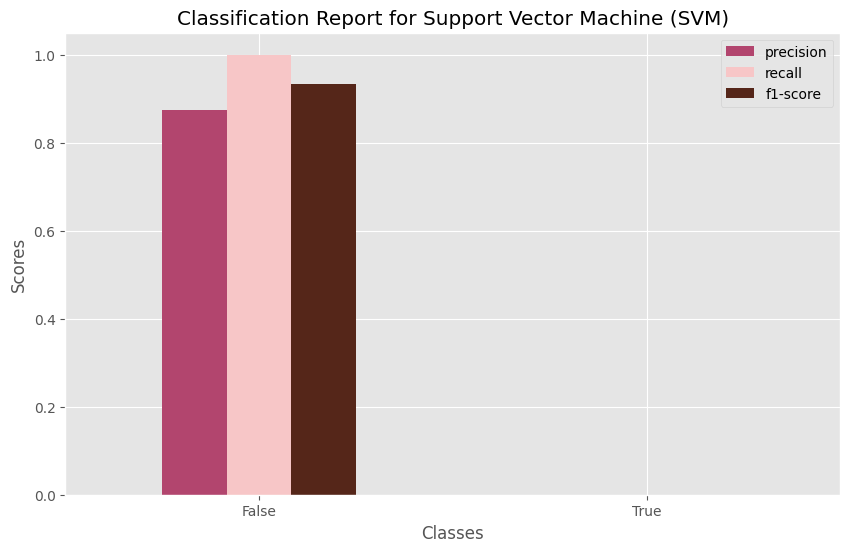

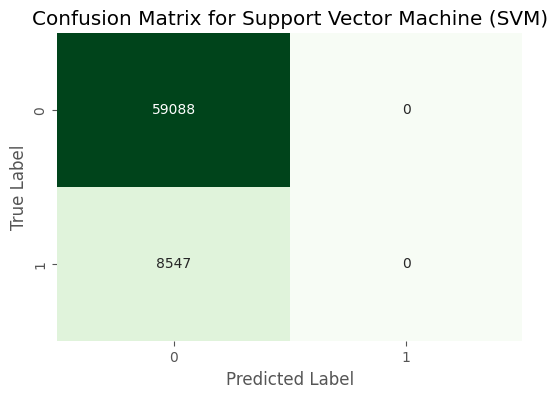

In [ ]:
# # Logistic regression and Cat Boosting
!pip install catboost
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC  # Importing Support Vector Classifier
from catboost import CatBoostClassifier

# Function to evaluate the model and measure training and prediction time
def evaluate_model_with_time(model, X_train, X_test, y_train, y_test, model_name):
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()

    train_time = end_train - start_train
    pred_time = end_pred - start_pred

    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    print(f"{model_name} Classification Report")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Prediction Time: {pred_time:.4f} seconds")
    print()

    return y_pred, train_time, pred_time, report_df

# Function to plot classification report metrics for true and false classes
def plot_classification_report_for_classes(report_df, model_name):
    # Identify the correct labels in the index
    labels = report_df.index.intersection(['0', '1', 'True', 'False'])

    # Filter the DataFrame for class labels that are present
    filtered_report_df = report_df.loc[labels, ['precision', 'recall', 'f1-score']]

    # Define custom colors
    colors = ['#B2456E', '#F7C6C7','#552619']  # Custom colors for the bars

    # Plot the bar chart
    filtered_report_df.plot(kind='bar', color=colors, figsize=(10, 6))
    plt.title(f'Classification Report for {model_name}')
    plt.xlabel('Classes')
    plt.ylabel('Scores')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "CatBoost": CatBoostClassifier(verbose=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    "K-Means Clustering": KMeans(n_clusters=3, random_state=42),
    "Support Vector Machine (SVM)": SVC()  # Adding SVM to the models
}

results = {}

# Loop through each model, evaluate, and plot results
for name, model in models.items():
    y_pred, train_time, pred_time, report_df = evaluate_model_with_time(model, X_train, X_test, y_train, y_test, name)

    plot_classification_report_for_classes(report_df, name)
    plot_confusion_matrix(y_test, y_pred, name)

    results[name] = {
        "y_pred": y_pred,
        "training_time": train_time,
        "prediction_time": pred_time
    }

